In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
# from sklearn.datasets import fetch_california_housing

In [2]:
dataset = load_breast_cancer()

In [3]:
data = pd.DataFrame(dataset.data)
data.columns = dataset.feature_names
y = pd.DataFrame(dataset.target)
y.columns = ['diagnosis']
data = data.join(y)

print (f"Total number of target classes are {len(dataset.target_names)} as {dataset.target_names} respectively \
1 and 0")
print (f"We have total {len(data)} patients data in our dataset")
data.head()

Total number of target classes are 2 as ['malignant' 'benign'] respectively 1 and 0
We have total 569 patients data in our dataset


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Expanding pandas dataframe view

In [4]:
pd.set_option(f"display.max_columns", data.shape[1])

In [5]:
print (f"Shape of data: {data.shape}, including target column: {data.columns[-1]}")
data.head()

Shape of data: (569, 31), including target column: diagnosis


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## If detailed description of this dataset is needed uncomment the following cell

In [6]:
# print (dataset.DESCR)

## Checking skewness of data
### If one class of data is a lot more than other then our model can be biased and can completely ignore other class. So, It is important that we have unbiased dataset<br><br>We have 30% as begign samples and 62% malignant samples in our dataset, which is not bad. The dataset is not too much skewed<br><br><font color='red'>NOTE: benign: non-cancerous = 0, malignant: cancerous = 1</font>

We have total 31 features (columns) and 569 samples in our dataset.
Out of total 569 samples, 212 are benign (37.26%), and 357 are malignant (62.74%).


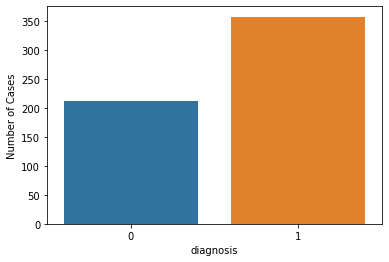

In [7]:
n_samples, n_features = data.shape
diagnosis_series = data.groupby('diagnosis').size()
n_benign_samples, n_malignant_samples = diagnosis_series

print (f"We have total {n_features} features (columns) and {n_samples} samples in our dataset.")
print (f"Out of total {n_samples} samples, {n_benign_samples} are benign ({(n_benign_samples/n_samples)*100:.2f}%), \
and {n_malignant_samples} are malignant ({(n_malignant_samples/n_samples)*100:.2f}%).")

_ = plt.ylabel('Number of Cases')
_ = sns.barplot(x=diagnosis_series.index, y=diagnosis_series.values)

## Data skewness

In [8]:
# axis=0/axis='rows' represents skewness for all the rows of a column or each column
# axis=1/axis='columns' represents skewness for each row of the dataset
data[['diagnosis']].skew(axis='rows', skipna=True)

diagnosis   -0.528461
dtype: float64

## We can group by all data by target column (diagnosis) and see the median of all columns to check how the columns correlate to our target column<br><br><font color='red'> Here we are using median and not mean because mean is prone to outliers (i.e. mean can increase if there one or just few values which are very high compare of rest) </font>

## As we can see that as the median of the almost any column increases, it is more likely that cancer will be malignant.
### By looking at the values we can have a rough estimate of which columns which are going to be more useful than others. This is useful step in selecting our features.<br><br>Here we can see the columns like <font color="red"> mean fractal dimension, texture error, smoothness error, symmetry error, etc</font> are not going to be much useful as their median values for both categories malignant and benign are almost same. 

In [9]:
data.groupby('diagnosis').median()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
diagnosis,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.325,21.46,114.20,932.0,0.10220,0.13235,0.15135,0.08628,0.1899,0.061575,0.5472,1.1025,3.6795,58.455,0.006209,0.02859,0.037125,0.014205,0.01770,0.003739,20.59,28.945,138.00,1303.0,0.14345,0.35635,0.4049,0.18200,0.3103,0.08760
1,12.200,17.39,78.18,458.4,0.09076,0.07529,0.03709,0.02344,0.1714,0.061540,0.2575,1.1080,1.8510,19.630,0.006530,0.01631,0.018400,0.009061,0.01909,0.002808,13.35,22.820,86.92,547.4,0.12540,0.16980,0.1412,0.07431,0.2687,0.07712


## Let's view the correlation between the columns
### Here we want to check every columns numeric relation to cancer being malignant or benign. We already have a rough idea of the useful columns from our previous analysis.<br>NOTE: Double click to zoom<br>

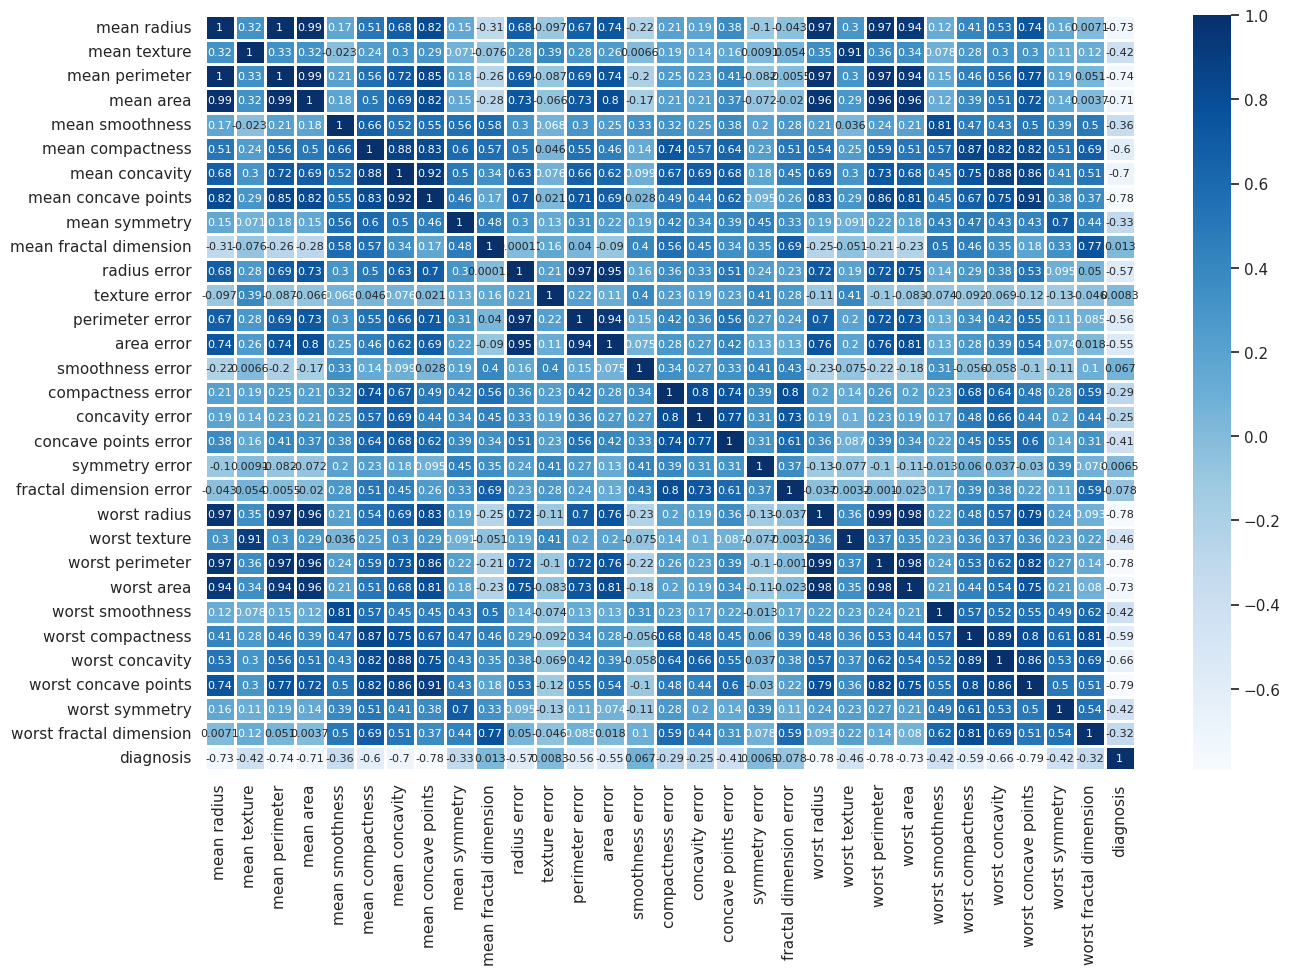

In [10]:
plt.figure(figsize=(15, 10), dpi=100) # This is displaying 1500 pixels by 1000 pixels heatmap
sns.set(font_scale=1)
_ = sns.heatmap(data.corr(), annot=True, annot_kws={"fontsize":8}, cmap='Blues', linecolor='white', \
            linewidth=1)

### As you can see in the above heatmap most of the columns are negatively correlated related to target column (diagnosis)<br><br>Negaegative corrleation represents that as the value of that column increases, it is more likely that cancer will be malignant or benign otherwise

## Split the data into train and test dataset, 20% dataset for testing

In [11]:
# If using fetch_california_housing then change column name to HouseAge else AGE
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.2, random_state=20)

In [12]:
print (f"We have {len(X_train)} number of training examples to train our dataset and {len(X_test)} samples to \
test our model's accuracy on previously unseen data")

We have 455 number of training examples to train our dataset and 114 samples to test our model's accuracy on previously unseen data


## Let's run the LogisticRegression with all the features of dataset and see the results

# Using PCA and StandardScaler
### Since we have 30 features, it's not possible to graph all the features. Thus, we will be using PCA (Principle Component Analysis) technique to scale down all 30 features to just 2 features.<br><br>We will lose some variance in scaling down the features, but the trade will almost worth it.<br><br> There are other techniques available to perform the same thing. PCA though is the most popular among them.<br><br>It's not a must, if you want you can just pass the data as it is to your model

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [14]:
# scaler = StandardScaler(with_mean=True, with_std=True)
scaler = StandardScaler(with_mean=True, with_std=True)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [15]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.fit_transform(X_test_scaled)

In [16]:
X_train_pca.shape, y_train.shape, X_test_pca.shape, y_test.shape

((455, 2), (455,), (114, 2), (114,))

## Using Logistic Regression without Regularization

In [17]:
# multi_class='ovr' (one vs rest) -> binary classification other options are 'auto', and 'multinomial', n_job=-1 means \
# all the processors will be used for this process

lr = LogisticRegression()
lr.fit(X_train_pca, y_train)

print (f"Accuracy with train dataset: {lr.score(X_train_pca, y_train):.2f}")
print (f"Accuracy with test dataset: {lr.score(X_test_pca, y_test):.2f}")
print (f"Coefficients: {lr.coef_}")
print (f"Intercept: {lr.intercept_}")
print (f"Number of iterations: {lr.n_iter_}")

Accuracy with train dataset: 0.95
Accuracy with test dataset: 0.96
Coefficients: [[-1.84176613  0.9838717 ]]
Intercept: [0.5360606]
Number of iterations: [12]


## Though we have set max_iter to 5000 due to default value of tol set to 0.0001 (1e-4) as soon as cost reduces less than 1e-4 training stops

In [18]:
# print (f"Accuracy with train dataset: {lr.score(X_train_pca, y_train):.2f}")
# print (f"Coefficients: {lr.coef_}")
# print (f"Intercept: {lr.intercept_}")
# print (f"Number of iterations: {lr.n_iter_}")
print (f"Accuracy with train dataset: {lr.score(X_train_pca, y_train):.2f}")
print (f"Coefficients: {lr.coef_}")
print (f"Intercept: {lr.intercept_}")
print (f"Number of iterations: {lr.n_iter_}")

Accuracy with train dataset: 0.95
Coefficients: [[-1.84176613  0.9838717 ]]
Intercept: [0.5360606]
Number of iterations: [12]


In [19]:
# print (f"Accuracy with test dataset: {lr.score(X_test_pca, y_test):.2f}")
print (f"Accuracy with test dataset: {lr.score(X_test_pca, y_test):.2f}")

Accuracy with test dataset: 0.96


## Plotting decision boundary

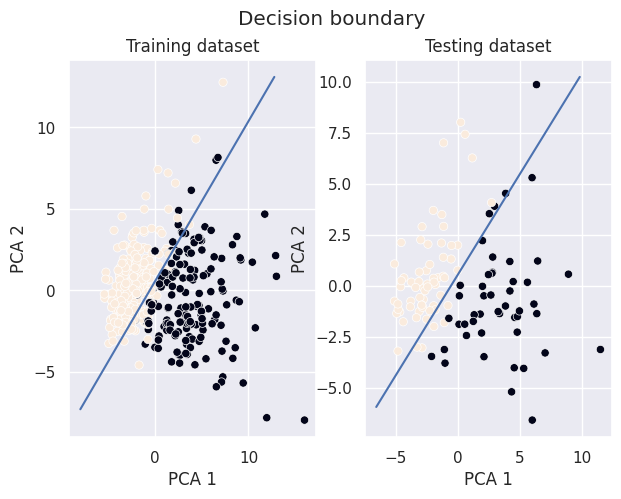

In [20]:
# _ = plt.figure(figsize=(7,5), dpi=100)
fig, ax = plt.subplots(1,2, figsize=(7,5), dpi=100, sharex=False)
fig.suptitle('Decision boundary')

a = (lr.coef_ * X_train_pca + lr.intercept_)

_ = sns.scatterplot(x=X_train_pca[:,0], y=X_train_pca[:,1], c=y_train, ax=ax[0])
_ = sns.lineplot(x=X_train_pca[:,1], y=a[:,1], ax=ax[0]) #a[:,1], ax=ax[0])
_ = ax[0].set_title("Training dataset")
_ = ax[0].set_xlabel('PCA 1')
_ = ax[0].set_ylabel('PCA 2')

a = (lr.coef_ * X_test_pca + lr.intercept_)

_ = sns.scatterplot(x=X_test_pca[:,0], y=X_test_pca[:,1], c=y_test, ax=ax[1])
_ = sns.lineplot(x=X_test_pca[:,1], y=a[:,1], ax=ax[1])
_ = ax[1].set_title("Testing dataset")
_ = ax[1].set_xlabel('PCA 1')
_ = ax[1].set_ylabel('PCA 2')

## As we have not used regularization (penalty->none), we can probably get better or almost same accuracy with lower iterations if we were using penalty to l2 or l1

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [22]:
y_pred = lr.predict(X_test_pca)
cm = confusion_matrix(y_test, y_pred)

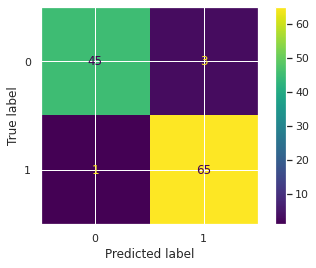

In [23]:
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_).plot()

In [24]:
from sklearn.metrics import precision_recall_fscore_support

In [25]:
#  average='weighted'/'micro'/'macro'
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

In [26]:
print (f"Precision: Means out of all the predictions model made {precision*100:.3f}% were correct")
print (f"Recall: Means out of total cancer patients, we made correct prediction about {recall*100:.3f}% patients")
print (f"f1-score: {f1_score*100:.3f}")

Precision: Means out of all the predictions model made 96.530% were correct
Recall: Means out of total cancer patients, we made correct prediction about 96.491% patients
f1-score: 96.480
